In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import numpy as np

In [2]:
def VWAP(DF):
    df=DF.copy()
    df["typ"]=(df["High"]+df["Low"]+df["Close"])/3
    df["typ_vol"]=df["typ"]*df["Volume"]
    df["cum_typ_vol"]=df["typ_vol"].cumsum()
    df["cum_vol"]=df["Volume"].cumsum()
    df["vwap"]=df["cum_typ_vol"]/df["cum_vol"]
    return df["vwap"]

In [3]:
ticker='tsla'

In [4]:
stock_intraday=pd.read_csv("tsla_intraday_1min_till_11.csv")
stock_intraday["Datetime"]=pd.to_datetime(stock_intraday["Datetime"])
stock_intraday["Adj Close"]=stock_intraday["Close"]
#might drop "Close"
stock_intraday.index=stock_intraday["Datetime"]
#might drop "Datetime"
stock_intraday

,Datetime,Open,High,Low,Close,Volume,hours,Adj Close
Datetime,,,,,,,,
2010-06-30 09:30:00,2010-06-30 09:30:00,25.880,26.050,25.400,25.5800,578051,intraday,25.5800
2010-06-30 09:31:00,2010-06-30 09:31:00,25.596,25.700,25.200,25.3000,176255,intraday,25.3000
2010-06-30 09:32:00,2010-06-30 09:32:00,25.300,25.360,25.060,25.1500,91341,intraday,25.1500
2010-06-30 09:33:00,2010-06-30 09:33:00,25.169,25.169,24.550,24.5500,172021,intraday,24.5500
2010-06-30 09:34:00,2010-06-30 09:34:00,24.550,24.980,24.550,24.8300,82318,intraday,24.8300
...,...,...,...,...,...,...,...,...
2022-12-23 10:55:00,2022-12-23 10:55:00,123.420,123.940,123.300,123.8601,551481,intraday,123.8601
2022-12-23 10:56:00,2022-12-23 10:56:00,123.880,123.880,123.560,123.8404,345444,intraday,123.8404
2022-12-23 10:57:00,2022-12-23 10:57:00,123.835,123.890,123.100,123.3600,446254,intraday,123.3600


<AxesSubplot:xlabel='Datetime'>

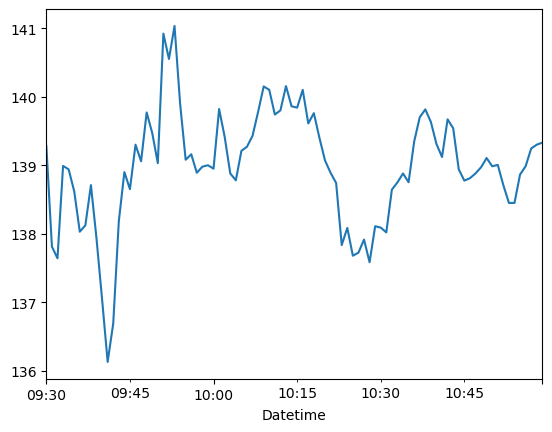

In [5]:
stock_intraday.loc['2022-12-21']['Close'].plot()

In [6]:
#stock_intraday=yf.download(ticker,period='60d',interval='5m')
#stock_intraday

In [7]:
import yfinance as yf
stock_daily=yf.download(ticker,period='max',interval='1d')
stock_daily

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166396100
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400


In [8]:
stock_daily.index[0]

Timestamp('2010-06-29 00:00:00')

In [9]:
stock_weekly=yf.download(ticker,period="max",interval='1wk')
stock_weekly

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-28,1.266667,2.028000,1.169333,1.280000,1.280000,739680000.0
2010-07-05,1.333333,1.333333,0.998667,1.160000,1.160000,383259000.0
2010-07-12,1.196667,1.433333,1.126667,1.376000,1.376000,231583500.0
2010-07-19,1.424667,1.483333,1.300000,1.419333,1.419333,107635500.0
2010-07-26,1.433333,1.433333,1.303333,1.329333,1.329333,45780000.0
...,...,...,...,...,...,...
2022-12-05,189.440002,191.270004,169.059998,179.050003,179.050003,471857900.0
2022-12-12,176.100006,177.369995,150.039993,150.229996,150.229996,687133600.0
2022-12-19,154.000000,155.250000,121.019997,123.150002,123.150002,820857700.0


In [10]:
stock_monthly=yf.download(ticker,period="max",interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [11]:
def pivot_daily(df):
    """
    input=1d dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R4"]=round(df["R3"]+(df["R2"]-df["R1"]),2)
    df["S4"]=round(df["S3"]-(df["S1"]-df["S2"]),2)
    return df

In [12]:
def pivot_weekly(df):
    """
    input=1 week dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [13]:
def pivot_monthly(df):
    """
    input=1 month dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [14]:
# call the pivot in daily timeframe daily

In [15]:
stock_daily["week"]=stock_daily.index.week

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/2912323420.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock_daily["week"]=stock_daily.index.week


In [16]:
stock_daily["month"]=stock_daily.index.month

In [17]:
stock_daily["year"]=stock_daily.index.year

In [18]:
stock_daily

,Open,High,Low,Close,Adj Close,Volume,week,month,year
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,26,6,2010
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,26,6,2010
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,26,7,2010
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,26,7,2010
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,27,7,2010
...,...,...,...,...,...,...,...,...,...
2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,51,12,2022
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166396100,51,12,2022
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,52,12,2022


In [19]:
stock_weekly["week"]=stock_weekly.index.week
stock_weekly["year"]=stock_weekly.index.year

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/37262271.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock_weekly["week"]=stock_weekly.index.week


In [20]:
stock_weekly

,Open,High,Low,Close,Adj Close,Volume,week,year
Date,,,,,,,,
2010-06-28,1.266667,2.028000,1.169333,1.280000,1.280000,739680000.0,26,2010
2010-07-05,1.333333,1.333333,0.998667,1.160000,1.160000,383259000.0,27,2010
2010-07-12,1.196667,1.433333,1.126667,1.376000,1.376000,231583500.0,28,2010
2010-07-19,1.424667,1.483333,1.300000,1.419333,1.419333,107635500.0,29,2010
2010-07-26,1.433333,1.433333,1.303333,1.329333,1.329333,45780000.0,30,2010
...,...,...,...,...,...,...,...,...
2022-12-05,189.440002,191.270004,169.059998,179.050003,179.050003,471857900.0,49,2022
2022-12-12,176.100006,177.369995,150.039993,150.229996,150.229996,687133600.0,50,2022
2022-12-19,154.000000,155.250000,121.019997,123.150002,123.150002,820857700.0,51,2022


In [21]:
stock_monthly["month"]=stock_monthly.index.month
stock_monthly["year"]=stock_monthly.index.year

In [22]:
stock_monthly

,Open,High,Low,Close,Adj Close,Volume,month,year
Date,,,,,,,,
2010-07-01,1.666667,1.728000,0.998667,1.329333,1.329333,9.686370e+08,7,2010
2010-08-01,1.366667,1.478667,1.159333,1.298667,1.298667,2.255730e+08,8,2010
2010-09-01,1.308000,1.544000,1.300000,1.360667,1.360667,2.706885e+08,9,2010
2010-10-01,1.379333,1.458000,1.333333,1.456000,1.456000,9.821700e+07,10,2010
2010-11-01,1.462667,2.400000,1.403333,2.355333,2.355333,4.247265e+08,11,2010
...,...,...,...,...,...,...,...,...
2022-09-01,272.579987,313.799988,262.470001,265.250000,265.250000,1.299271e+09,9,2022
2022-10-01,254.500000,257.500000,198.589996,227.539993,227.539993,1.735263e+09,10,2022
2022-11-01,234.050003,237.399994,166.190002,194.699997,194.699997,1.885275e+09,11,2022


In [23]:
len(stock_daily)

3149

In [24]:
pivot_daily

<function __main__.pivot_daily(df)>

In [25]:
daily_pivot=pivot_daily(stock_daily)
weekly_pivot=pivot_weekly(stock_weekly)
monthly_pivot=pivot_monthly(stock_monthly)

In [26]:
daily_pivot

,Open,High,Low,Close,Adj Close,Volume,week,month,year,PP,BC,TC,R1,S1,R2,S2,R3,S3,R4,S4
Date,,,,,,,,,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,26,6,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,26,6,2010,1.48,1.42,1.54,1.79,1.29,1.98,0.98,2.29,0.80,2.48,0.49
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,26,7,2010,1.72,1.79,1.65,1.89,1.41,2.19,1.25,2.36,0.94,2.66,0.78
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,26,7,2010,1.51,1.54,1.48,1.67,1.29,1.89,1.13,2.05,0.92,2.27,0.76
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,27,7,2010,1.36,1.39,1.33,1.47,1.18,1.65,1.07,1.77,0.89,1.95,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,51,12,2022,138.24,138.57,137.91,140.59,135.22,143.61,132.87,145.96,129.85,148.98,127.50
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166396100,51,12,2022,128.08,129.45,126.71,133.90,119.53,142.45,113.71,148.27,105.16,156.82,99.34
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,52,12,2022,124.26,124.82,123.70,127.50,119.90,131.86,116.66,135.10,112.30,139.46,109.06


In [27]:
weekly_pivot

,Open,High,Low,Close,Adj Close,Volume,week,year,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
2010-06-28,1.266667,2.028000,1.169333,1.280000,1.280000,739680000.0,26,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,1.333333,1.333333,0.998667,1.160000,1.160000,383259000.0,27,2010,1.49,1.81,0.95,2.35,0.63,2.67,0.09
2010-07-12,1.196667,1.433333,1.126667,1.376000,1.376000,231583500.0,28,2010,1.16,1.32,0.99,1.49,0.83,1.66,0.65
2010-07-19,1.424667,1.483333,1.300000,1.419333,1.419333,107635500.0,29,2010,1.31,1.49,1.19,1.62,1.00,1.80,0.88
2010-07-26,1.433333,1.433333,1.303333,1.329333,1.329333,45780000.0,30,2010,1.40,1.50,1.32,1.58,1.22,1.68,1.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-05,189.440002,191.270004,169.059998,179.050003,179.050003,471857900.0,49,2022,190.84,202.93,182.76,211.01,170.67,223.10,162.59
2022-12-12,176.100006,177.369995,150.039993,150.229996,150.229996,687133600.0,50,2022,179.79,190.52,168.31,202.00,157.58,212.73,146.10
2022-12-19,154.000000,155.250000,121.019997,123.150002,123.150002,820857700.0,51,2022,159.21,168.38,141.05,186.54,131.88,195.71,113.72


In [28]:
weekly_pivot=weekly_pivot[:-1]

In [29]:
monthly_pivot

,Open,High,Low,Close,Adj Close,Volume,month,year,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
2010-07-01,1.666667,1.728000,0.998667,1.329333,1.329333,9.686370e+08,7,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,1.366667,1.478667,1.159333,1.298667,1.298667,2.255730e+08,8,2010,1.35,1.70,0.97,2.08,0.62,2.43,0.24
2010-09-01,1.308000,1.544000,1.300000,1.360667,1.360667,2.706885e+08,9,2010,1.31,1.46,1.14,1.63,0.99,1.78,0.82
2010-10-01,1.379333,1.458000,1.333333,1.456000,1.456000,9.821700e+07,10,2010,1.40,1.50,1.26,1.64,1.16,1.74,1.01
2010-11-01,1.462667,2.400000,1.403333,2.355333,2.355333,4.247265e+08,11,2010,1.42,1.51,1.38,1.54,1.30,1.63,1.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,272.579987,313.799988,262.470001,265.250000,265.250000,1.299271e+09,9,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,254.500000,257.500000,198.589996,227.539993,227.539993,1.735263e+09,10,2022,280.51,298.55,247.22,331.84,229.18,349.88,195.89
2022-11-01,234.050003,237.399994,166.190002,194.699997,194.699997,1.885275e+09,11,2022,227.88,257.17,198.26,286.79,168.97,316.08,139.35


In [30]:
monthly_pivot=monthly_pivot[:-1]

In [171]:
import datetime as dt
today=dt.datetime(2022,11,25)
print(today)
print(today.year)
print(today.month)
print(today.day)
print(today.isocalendar().week)    #getting the week of the year

2022-11-25 00:00:00
2022
11
25
47


In [83]:
weekly_pivot["week"]==today.isocalendar().week

Date
1993-01-25    False
1993-02-01    False
1993-02-08    False
1993-02-15    False
1993-02-22    False
              ...  
2022-12-05    False
2022-12-12    False
2022-12-16    False
2022-12-19    False
2022-12-26    False
Name: week, Length: 1682, dtype: bool

In [84]:
weekly_pivot["year"]==today.year

Date
1993-01-25    False
1993-02-01    False
1993-02-08    False
1993-02-15    False
1993-02-22    False
              ...  
2022-12-05     True
2022-12-12     True
2022-12-16     True
2022-12-19     True
2022-12-26     True
Name: year, Length: 1682, dtype: bool

In [85]:
for i in range(len(weekly_pivot)):
    if weekly_pivot["week"][i]==today.isocalendar().week and weekly_pivot["year"][i]==today.year:
        week_index=i

In [86]:
weekly_pivot.iloc[week_index]

Open         3.946400e+02
High         4.029300e+02
Low          3.926600e+02
Close        4.023300e+02
Adj Close    4.004909e+02
Volume       2.104792e+08
week         4.700000e+01
year         2.022000e+03
PP           3.961600e+02
R1           4.021800e+02
S1           3.900100e+02
R2           4.083300e+02
S2           3.839900e+02
R3           4.143500e+02
S3           3.778400e+02
Name: 2022-11-21 00:00:00, dtype: float64

In [87]:
weekly_pivot.iloc[week_index:]["R1"][0]


402.18

In [88]:
weekly_pivot.iloc[week_index:]["S1"][0]


390.01

In [89]:
weekly_pivot.iloc[week_index:]["PP"][0]


396.16

In [ ]:
for j in range(len(monthly_pivot)):
    if monthly_pivot["month"][j]==today.month and monthly_pivot["year"][j]==today.year:
        month_index=j
        

In [ ]:
monthly_pivot.iloc[month_index]

In [ ]:
monthly_pivot.iloc[month_index:]['PP'][0]

In [ ]:
monthly_pivot.iloc[month_index:]["S1"][0]

In [ ]:
monthly_pivot.iloc[month_index:]["R1"][0]

In [ ]:
date='2022-11-25'
daily_pivot.loc[date]["Low"]

In [ ]:
daily_pivot.loc[date]["PP"]

In [ ]:
daily_pivot.loc[date]["TC"]

In [ ]:
daily_pivot.loc[date]["BC"]

In [ ]:
daily_pivot.loc[date]["S1"]

In [ ]:
daily_pivot.loc[date]["R1"]

In [ ]:
daily_pivot.loc[date]["R2"]

In [ ]:
daily_pivot.loc[date]["S2"]

In [ ]:
daily_pivot.shift(1).loc[date]["High"]

In [ ]:
#plot the candle stick

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_12970/255381238.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',hlines=[400,np.nan])


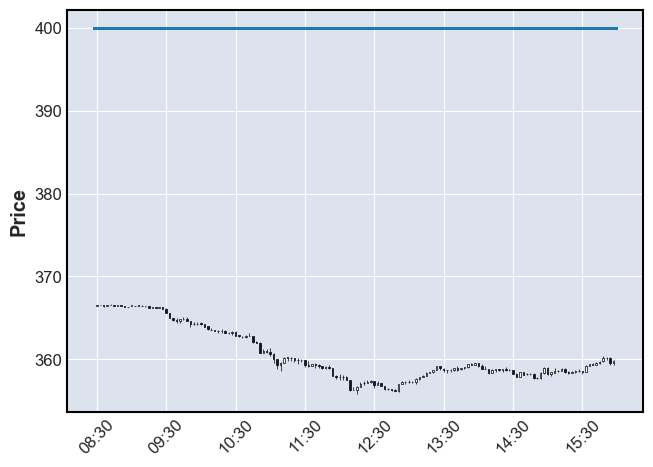

In [52]:
import numpy as np

mpf.plot(stock_intraday[date],type='candle',hlines=[400,np.nan])


In [42]:
type(stock_intraday[date]['Close'])

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/388683785.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  type(stock_intraday[date]['Close'])


pandas.core.series.Series

In [44]:
adjusted_stock_intraday=stock_intraday[date]['Close']/3

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/1566723399.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  adjusted_stock_intraday=stock_intraday[date]['Close']/3


<AxesSubplot:xlabel='Datetime'>

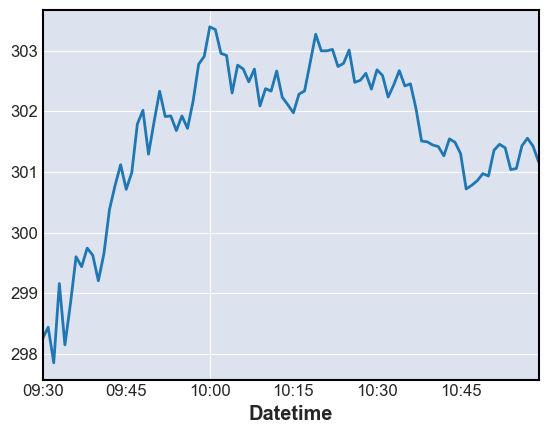

In [45]:
adjusted_stock_intraday.plot()

In [48]:
dummy_date=dt.datetime(2022,5,25)

In [49]:
if dummy_date<dt.datetime(2022,8,25):
    stock_intraday[date]["Close"]

2022-05-25 00:00:00


In [53]:
import datetime as dt

date1=dt.datetime(2022,8,24)
date='2022-08-24'

#stock_intraday[date]["Adj Close"].plot()
#plot daily pivots
daily_pp=daily_pivot.loc[date]["PP"]
daily_bc=daily_pivot.loc[date]["BC"]
daily_tc=daily_pivot.loc[date]["TC"]

daily_r1=daily_pivot.loc[date]["R1"]
daily_s1=daily_pivot.loc[date]["S1"]

if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R2"]<stock_daily.loc[date]["High"]:
    daily_r2=daily_pivot.loc[date]["R2"]
else:
    daily_r2=np.nan
        
if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S2"]<stock_daily.loc[date]["High"]:
    daily_s2=daily_pivot.loc[date]["S2"]
else:
    daily_s2=np.nan
    
if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R3"]<stock_daily.loc[date]["High"]:
    daily_r3=daily_pivot.loc[date]["R3"]
else:
    daily_r3=np.nan
    
if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S3"]<stock_daily.loc[date]["High"]:
    daily_s3=daily_pivot.loc[date]["S3"]
else:
    daily_s3=np.nan

if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R4"]<stock_daily.loc[date]["High"]:
    daily_r4=daily_pivot.loc[date]["R4"]
else:
    daily_r4=np.nan
    
if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S4"]<stock_daily.loc[date]["High"]:
    daily_s4=daily_pivot.loc[date]["S4"]
else:
    daily_s4=np.nan
    
#plt.axhline(y=daily_pivot.loc[date]["PP"],color='b',linestyle='-')
#plt.axhline(y=daily_pivot.loc[date]["TC"],color='b',linestyle='--')
#plt.axhline(y=daily_pivot.loc[date]["BC"],color='b',linestyle='--')

#plt.axhline(y=daily_pivot.loc[date]["R1"],color='b',linestyle='--')
#plt.axhline(y=daily_pivot.loc[date]["S1"],color='b',linestyle='--')

i=0
j=0
#plot weekly pivots
for i in range(len(weekly_pivot)):
    if weekly_pivot["week"][i]==date1.isocalendar().week and weekly_pivot["year"][i]==date1.year:
        index_week=i
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["PP"][0]<stock_daily.loc[date]["High"]:
    weekly_pp=weekly_pivot.iloc[index_week:]["PP"][0]
else:
    weekly_pp=np.nan
    
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["R1"][0]<stock_daily.loc[date]["High"]:
    weekly_r1=weekly_pivot.iloc[index_week:]["R1"][0]
else:
    weekly_r1=np.nan
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["S1"][0]<stock_daily.loc[date]["High"]:
    weekly_s1=weekly_pivot.iloc[index_week:]["S1"][0]
else:
    weekly_s1=np.nan
    
for j in range(len(monthly_pivot)):
    if monthly_pivot["month"][j]==date1.month and monthly_pivot["year"][j]==date1.year:
        index_month=j
        
#plot monthly pivots
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['PP'][0]<stock_daily.loc[date]["High"]:
    monthly_pp=monthly_pivot.iloc[index_month:]['PP'][0]
else:
    monthly_pp=np.nan
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['R1'][0]<stock_daily.loc[date]["High"]:
    monthly_r1=monthly_pivot.iloc[index_month:]['R1'][0]
else:
    monthly_r1=np.nan
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['S1'][0]<stock_daily.loc[date]["High"]:
    monthly_s1=monthly_pivot.iloc[index_month:]['S1'][0]
else:
    monthly_s1=np.nan
    
yes_high=daily_pivot.shift(1).loc[date]["High"]
yes_low=daily_pivot.shift(1).loc[date]["Low"]

##only for stock split
if date1<dt.datetime(2022,8,25):
    stock_intraday[date]=stock_intraday[date]/3

mpf.plot(stock_intraday[date],type='candle',
         hlines=dict(hlines=[daily_pp,daily_bc,daily_tc,daily_r1,daily_s1,daily_r2,daily_s2,daily_r3,daily_s3,daily_r4,daily_s4,weekly_pp,weekly_r1,weekly_s1,monthly_pp,monthly_r1,monthly_s1,yes_high,yes_low],
                    colors=['b','b','b','b','b','b','b','b','b','b','b','r','r','r','g','g','g','k','k'],
                    linestyle=['-','--','--','--','--','--','--','--','--','--','--','-','--','--','-','--','--','-','-']),
         title=date,
        savefig='testsave2.png')

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/3013121581.py:95: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock_intraday[date]=stock_intraday[date]/3


TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [31]:
#subset the stock
import numpy as np
stock_daily=stock_daily["2022"]
stock_daily

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/3484992934.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock_daily=stock_daily["2022"]


,Open,High,Low,Close,Adj Close,Volume,week,month,year,PP,BC,TC,R1,S1,R2,S2,R3,S3,R4,S4
Date,,,,,,,,,,,,,,,,,,,,
2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,1,1,2022,354.82,356.10,353.54,358.11,348.97,363.96,345.68,367.25,339.84,373.10,336.55
2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,1,1,2022,392.99,389.52,396.46,407.30,385.62,414.67,371.31,428.98,363.95,436.35,349.64
2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,1,1,2022,386.74,388.51,384.97,399.13,370.81,415.06,358.42,427.45,342.50,443.38,330.11
2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,1,1,2022,371.05,375.23,366.87,381.76,351.99,400.83,341.27,411.54,322.21,430.61,311.49
2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,1,1,2022,352.58,351.42,353.74,364.99,342.49,375.08,330.08,387.49,319.99,397.58,307.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,51,12,2022,138.24,138.57,137.91,140.59,135.22,143.61,132.87,145.96,129.85,148.98,127.50
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166396100,51,12,2022,128.08,129.45,126.71,133.90,119.53,142.45,113.71,148.27,105.16,156.82,99.34
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,52,12,2022,124.26,124.82,123.70,127.50,119.90,131.86,116.66,135.10,112.30,139.46,109.06


In [173]:
# for i in range(len(stock_daily)):
#     date=stock_daily.index[i]
#     break

In [174]:
# #now.strftime("%m/%d/%Y, %H:%M:%S")
# date=date.strftime("%Y-%m-%d")
# date

In [175]:
#stock_intraday[date]["Adj Close"].plot()

In [33]:
for i in range(len(stock_daily)):
    date_datetime=stock_daily.index[i]
    date=date_datetime.strftime("%Y-%m-%d")
    
    print(date)
    #plot daily pivots
    daily_pp=daily_pivot.loc[date]["PP"]
    daily_bc=daily_pivot.loc[date]["BC"]
    daily_tc=daily_pivot.loc[date]["TC"]

    daily_r1=daily_pivot.loc[date]["R1"]
    daily_s1=daily_pivot.loc[date]["S1"]
    
    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R2"]<stock_daily.loc[date]["High"]:
        daily_r2=daily_pivot.loc[date]["R2"]
    else:
        daily_r2=np.nan
        
    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S2"]<stock_daily.loc[date]["High"]:
        daily_s2=daily_pivot.loc[date]["S2"]
    else:
        daily_s2=np.nan
    
    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R3"]<stock_daily.loc[date]["High"]:
        daily_r3=daily_pivot.loc[date]["R3"]
    else:
        daily_r3=np.nan
    
    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S3"]<stock_daily.loc[date]["High"]:
        daily_s3=daily_pivot.loc[date]["S3"]
    else:
        daily_s3=np.nan

    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R4"]<stock_daily.loc[date]["High"]:
        daily_r4=daily_pivot.loc[date]["R4"]
    else:
        daily_r4=np.nan
    
    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S4"]<stock_daily.loc[date]["High"]:
        daily_s4=daily_pivot.loc[date]["S4"]
    else:
        daily_s4=np.nan

    i=0
    j=0
    #plot weekly pivots
    for i in range(len(weekly_pivot)):
        if weekly_pivot["week"][i]==date_datetime.isocalendar().week and weekly_pivot["year"][i]==date_datetime.year:
            index_week=i
    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["PP"][0]<stock_daily.loc[date]["High"]:
        weekly_pp=weekly_pivot.iloc[index_week:]["PP"][0]
    else:
        weekly_pp=np.nan

    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["R1"][0]<stock_daily.loc[date]["High"]:
        weekly_r1=weekly_pivot.iloc[index_week:]["R1"][0]
    else:
        weekly_r1=np.nan
    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["S1"][0]<stock_daily.loc[date]["High"]:
        weekly_s1=weekly_pivot.iloc[index_week:]["S1"][0]
    else:
        weekly_s1=np.nan

    for j in range(len(monthly_pivot)):
        if monthly_pivot["month"][j]==date_datetime.month and monthly_pivot["year"][j]==date_datetime.year:
            index_month=j

    #plot monthly pivots
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['PP'][0]<stock_daily.loc[date]["High"]:
        monthly_pp=monthly_pivot.iloc[index_month:]['PP'][0]
    else:
        monthly_pp=np.nan
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['R1'][0]<stock_daily.loc[date]["High"]:
        monthly_r1=monthly_pivot.iloc[index_month:]['R1'][0]
    else:
        monthly_r1=np.nan
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['S1'][0]<stock_daily.loc[date]["High"]:
        monthly_s1=monthly_pivot.iloc[index_month:]['S1'][0]
    else:
        monthly_s1=np.nan

    yes_high=daily_pivot.shift(1).loc[date]["High"]
    yes_low=daily_pivot.shift(1).loc[date]["Low"]
    
    
    mpf.plot(stock_intraday[date],type='candle',
             hlines=dict(hlines=[daily_pp,daily_bc,daily_tc,daily_r1,daily_s1,daily_r2,daily_s2,daily_r3,daily_s3,daily_r4,daily_s4,weekly_pp,weekly_r1,weekly_s1,monthly_pp,monthly_r1,monthly_s1,yes_high,yes_low],
                        colors=['b','b','b','r','g','r','g','r','g','r','g','c','c','c','y','y','y','k','k'],
                        linestyle=['-','--','--','--','--','--','--','--','--','--','--','-','--','--','-','--','--','-','-']),
             title=date,
            savefig='nasdaq/tsla/1min_till_11/2022/'+date+'.png')
    #plt.clf()
    

2022-01-03
2022-01-04
2022-01-05


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-01-06
2022-01-07
2022-01-10
2022-01-11


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-01-12
2022-01-13
2022-01-14
2022-01-18


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-01-19
2022-01-20
2022-01-21


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-01-24
2022-01-25
2022-01-26
2022-01-27


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-01-28
2022-01-31
2022-02-01
2022-02-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-02-03
2022-02-04
2022-02-07


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-02-08
2022-02-09
2022-02-10
2022-02-11


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-02-14
2022-02-15
2022-02-16
2022-02-17


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-02-18
2022-02-22
2022-02-23
2022-02-24


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-02-25
2022-02-28
2022-03-01


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-03-02
2022-03-03
2022-03-04
2022-03-07


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-03-08
2022-03-09
2022-03-10
2022-03-11


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-03-14
2022-03-15
2022-03-16
2022-03-17


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-03-18
2022-03-21
2022-03-22


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-03-23
2022-03-24
2022-03-25
2022-03-28


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-03-29
2022-03-30
2022-03-31
2022-04-01


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-04-04
2022-04-05
2022-04-06
2022-04-07


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-04-08
2022-04-11
2022-04-12
2022-04-13


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-04-14
2022-04-18
2022-04-19
2022-04-20


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-04-21
2022-04-22


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-04-25
2022-04-26
2022-04-27
2022-04-28


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-04-29
2022-05-02
2022-05-03
2022-05-04


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-05-05
2022-05-06
2022-05-09
2022-05-10


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-05-11
2022-05-12
2022-05-13
2022-05-16


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-05-17
2022-05-18
2022-05-19
2022-05-20


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-05-23
2022-05-24
2022-05-25
2022-05-26


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',


2022-05-27
2022-05-31


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-06-01
2022-06-02
2022-06-03
2022-06-06


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-06-07
2022-06-08
2022-06-09
2022-06-10


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-06-13
2022-06-14
2022-06-15
2022-06-16


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-06-17
2022-06-21
2022-06-22
2022-06-23


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-06-24
2022-06-27
2022-06-28
2022-06-29


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-06-30
2022-07-01
2022-07-05
2022-07-06


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-07-07
2022-07-08
2022-07-11
2022-07-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-07-13
2022-07-14
2022-07-15


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',


2022-07-18
2022-07-19
2022-07-20
2022-07-21
2022-07-22


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-07-25
2022-07-26
2022-07-27
2022-07-28


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-07-29
2022-08-01
2022-08-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-08-03
2022-08-04
2022-08-05
2022-08-08


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-08-09
2022-08-10
2022-08-11
2022-08-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-08-15
2022-08-16
2022-08-17
2022-08-18


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-08-19
2022-08-22
2022-08-23
2022-08-24


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-08-25
2022-08-26
2022-08-29
2022-08-30


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-08-31
2022-09-01
2022-09-02
2022-09-06


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-09-07
2022-09-08
2022-09-09
2022-09-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-09-13


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-09-14
2022-09-15
2022-09-16
2022-09-19


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-09-20
2022-09-21
2022-09-22
2022-09-23


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-09-26
2022-09-27
2022-09-28
2022-09-29


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-09-30
2022-10-03
2022-10-04
2022-10-05


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-10-06
2022-10-07
2022-10-10
2022-10-11


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-10-12
2022-10-13
2022-10-14
2022-10-17


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-10-18
2022-10-19
2022-10-20
2022-10-21


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-10-24
2022-10-25
2022-10-26
2022-10-27


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-10-28
2022-10-31
2022-11-01


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-11-02
2022-11-03
2022-11-04
2022-11-07


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-11-08
2022-11-09
2022-11-10
2022-11-11


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-11-14
2022-11-15
2022-11-16
2022-11-17


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-11-18
2022-11-21
2022-11-22
2022-11-23
2022-11-25
2022-11-28


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-11-29
2022-11-30
2022-12-01
2022-12-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-12-05
2022-12-06
2022-12-07


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-12-08
2022-12-09
2022-12-12
2022-12-13


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-12-14
2022-12-15
2022-12-16
2022-12-19


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-12-20
2022-12-21
2022-12-22
2022-12-23


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1222/869318549.py:85: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intrada

2022-12-27


KeyError: '2022-12-27'